In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', palette='muted', color_codes=True)

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.inspection import permutation_importance

# Set random seed for reproducibility
np.random.seed(42)
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("~/Downloads/Machine Learning/synthetic_stock_data.csv")

df.head()

,Date,Company,Sector,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,Dividend_Yield,Volatility,Sentiment_Score,Trend
0,2022-01-01,Uber,Technology,100.000000,101.036120,97.477809,100.000000,171958,5.156585e+11,24.253218,0.163090,0.047484,0.939232,Bearish
1,2022-01-02,Tesla,Automotive,100.071106,102.037960,97.152675,100.071106,196867,9.755658e+11,18.602848,0.288515,0.022472,0.469417,Bearish
2,2022-01-03,Panasonic,Finance,99.857828,101.517497,98.108097,99.857828,181932,4.595300e+11,10.728933,2.221827,0.019991,0.399193,Bullish
3,2022-01-04,Tencent,Automotive,98.851663,101.303783,96.998218,98.851663,153694,5.577481e+11,14.582696,1.377740,0.036166,0.705853,Stable
4,2022-01-05,Wells Fargo,Automotive,98.391118,99.990486,96.230707,98.391118,169879,8.607714e+11,37.491114,3.110198,0.034770,-0.768354,Stable


In [7]:
df.shape

(1000, 14)

In [8]:
df.tail()

,Date,Company,Sector,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,Dividend_Yield,Volatility,Sentiment_Score,Trend
995,2024-09-22,Pfizer,Energy,121.428608,123.693983,119.425495,121.428608,54757,4.469189e+10,22.313632,0.083782,0.018820,0.627218,Stable
996,2024-09-23,Panasonic,Consumer Goods,122.302376,124.731488,120.182416,122.302376,69097,1.116972e+11,22.945209,3.395996,0.017438,0.429906,Bullish
997,2024-09-24,Goldman Sachs,Energy,120.638302,122.485538,118.135033,120.638302,191467,5.989330e+11,21.854227,0.382841,0.048033,-0.502406,Bearish
998,2024-09-25,Lyft,Aerospace,120.228806,123.124765,117.959012,120.228806,197313,9.591669e+10,27.240528,2.103806,0.018396,0.820433,Bullish
999,2024-09-26,Boeing,Energy,120.558294,123.699478,117.628380,120.558294,153892,3.766169e+11,8.175260,3.008411,0.020437,-0.691168,Bullish


In [ ]:
df.isna().sum()
# isna() is a method that returns a dataframe of the same size (rows and columns) but returns the places that are None or N/A as True while returning the 
#  places that are already existed as False
# isna().sum() represents the count of each feature for missing values from the given input samples

Date               0
Company            0
Sector             0
Open               0
High               0
Low                0
Close              0
Volume             0
Market_Cap         0
PE_Ratio           0
Dividend_Yield     0
Volatility         0
Sentiment_Score    0
Trend              0
dtype: int64

In [10]:
df.duplicated().sum()

0

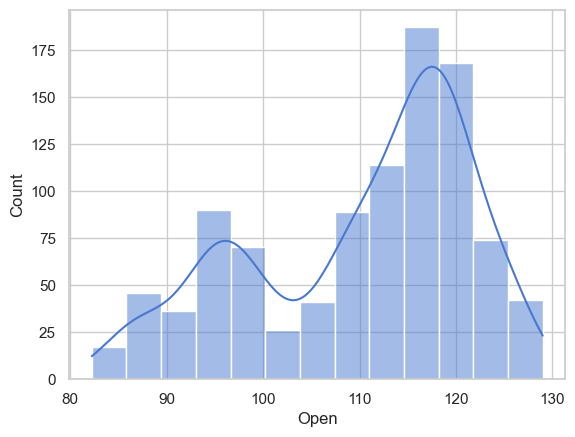

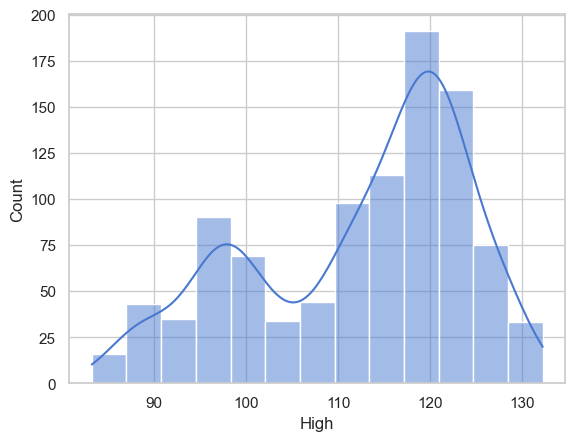

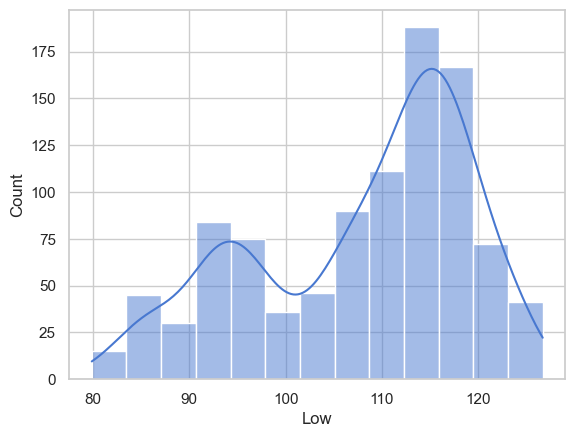

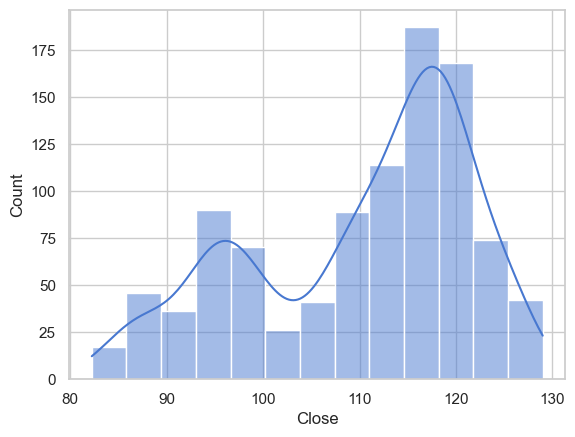

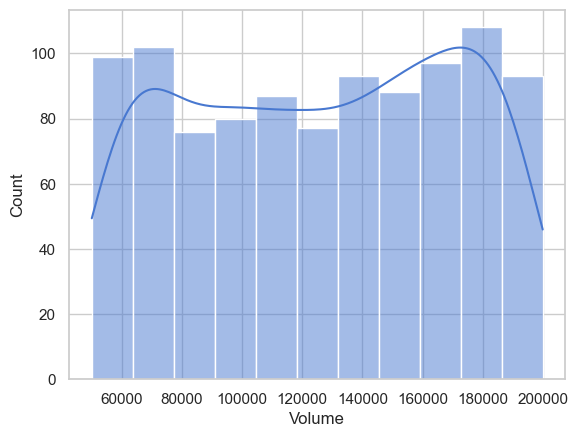

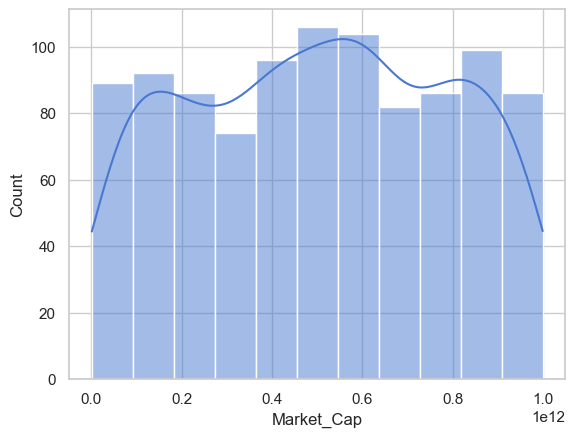

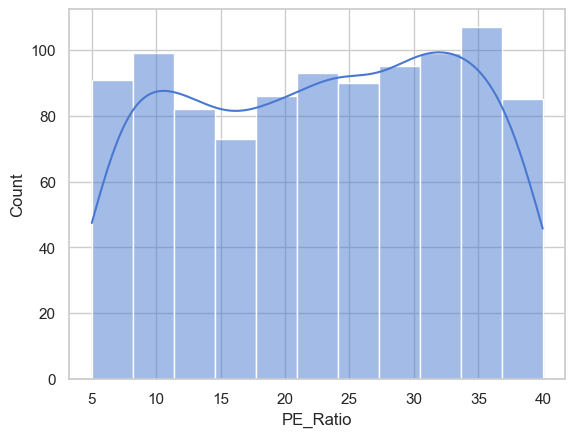

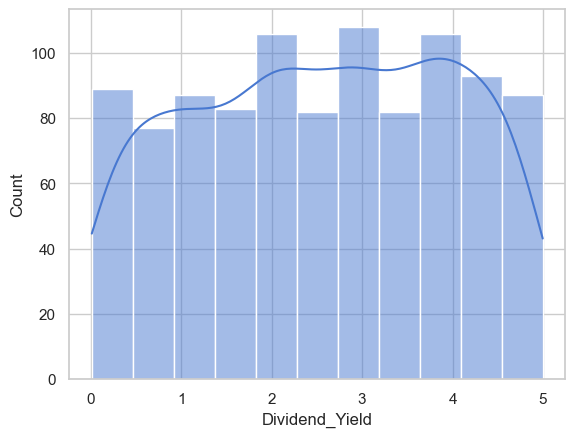

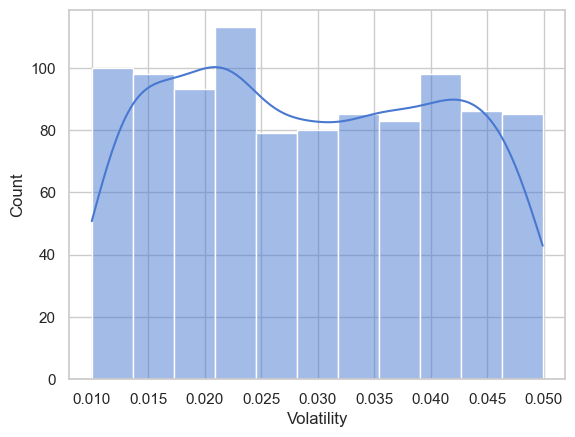

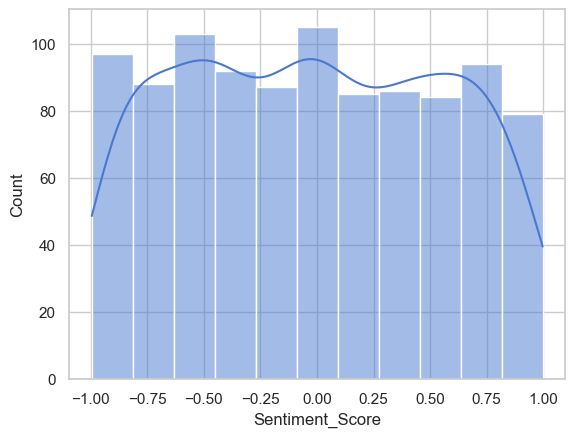

In [14]:
numeric_cols = df.select_dtypes(include=['number']).columns
# selects columns that contain datatypes that are of type 'number'
for col in numeric_cols:
# for each column or feature that has numeric datatypes
# create a bar graph
    sns.histplot(x=col, data=df, kde=True)
    plt.show()

In [15]:
df.dtypes

Date                object
Company             object
Sector              object
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Market_Cap         float64
PE_Ratio           float64
Dividend_Yield     float64
Volatility         float64
Sentiment_Score    float64
Trend               object
dtype: object

In [16]:
df.columns

Index(['Date', 'Company', 'Sector', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market_Cap', 'PE_Ratio', 'Dividend_Yield', 'Volatility',
       'Sentiment_Score', 'Trend'],
      dtype='object')